# window coverage test

In [680]:
#! mili_benchmark/scripts/shell/count_coverage.sh
data=pd.read_csv('data/MotifPipeline/compare/count.txt',names=['cell_tf','unique','full','tmp','window'],sep=' ',index_col=0)


In [681]:
data['size']=data.window.str.split("_").str[2].tolist()
data['cell']=data.index.str.split("_").str[0].tolist()
data['tf']=data.index.str.split("_").str[1].tolist()

In [682]:
del data['tmp'], data['window']

In [683]:
data2=data[data.full.apply(lambda x: x.isnumeric())]
data2['full']=pd.to_numeric(data2['full'])

In [684]:
data2['perc']=data2.unique/data2.full

In [650]:
# cc=plt.hist(data2.unique,log=True,bins=100,alpha=0.5)
# cc=plt.hist(data2.full,log=True,bins=100,alpha=.5)

In [660]:
data3=data2.groupby(['cell','size']).sum()#agg({'full':'sum'},{'unique','sum'})
data3=data3.reset_index()
data4=data3.melt(id_vars=['cell', 'size'],value_vars=['unique','full'])

In [661]:
data4=data4.sort_values('cell')
data4['size']=data4['size'].astype(int)

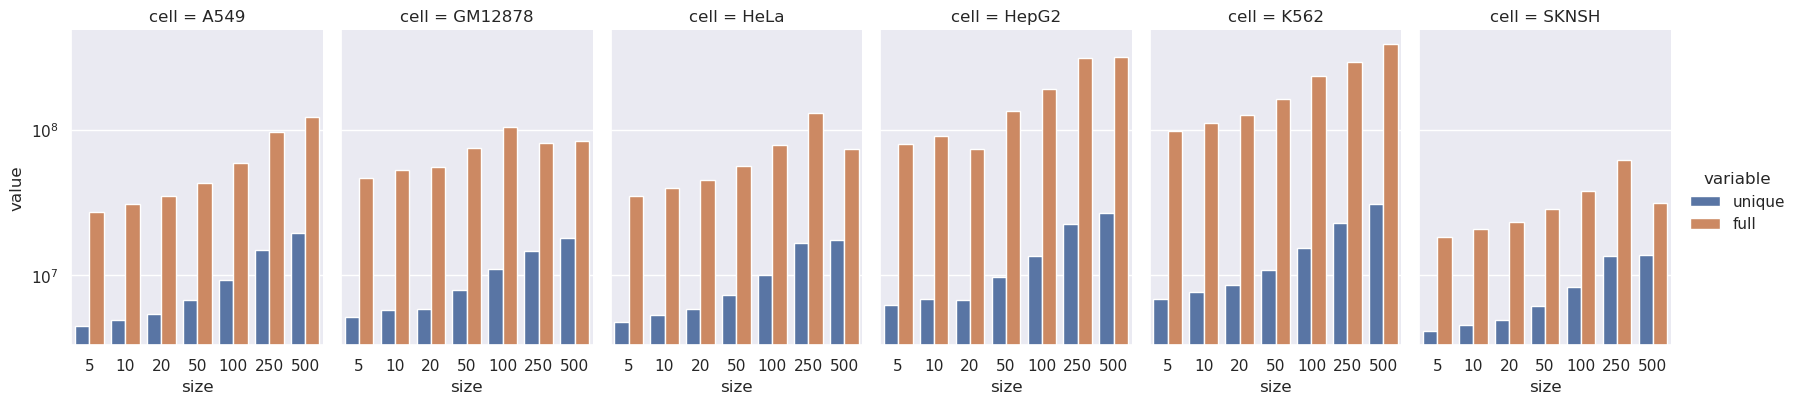

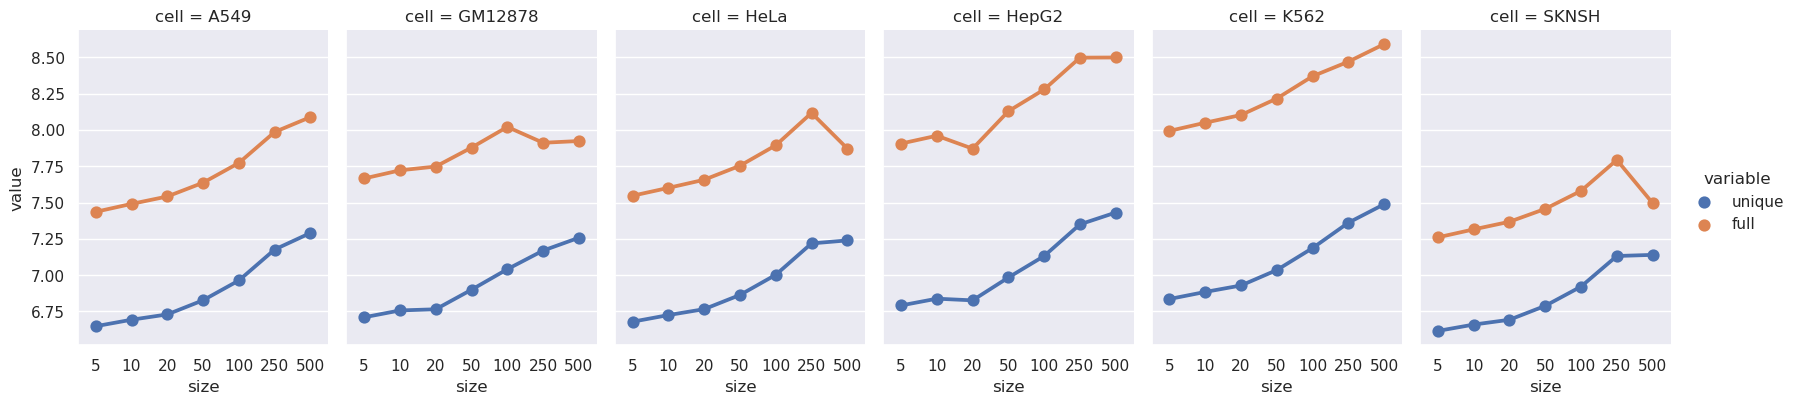

In [662]:
g = sns.catplot(x="size", y="value",hue="variable", col="cell",
                data=data4, kind="bar",height=4, aspect=.7,log=True)
g = sns.catplot(x="size", y=np.log10(data4.value),hue="variable", col="cell",
                data=data4, kind="point",height=4,aspect=.7,log=True)

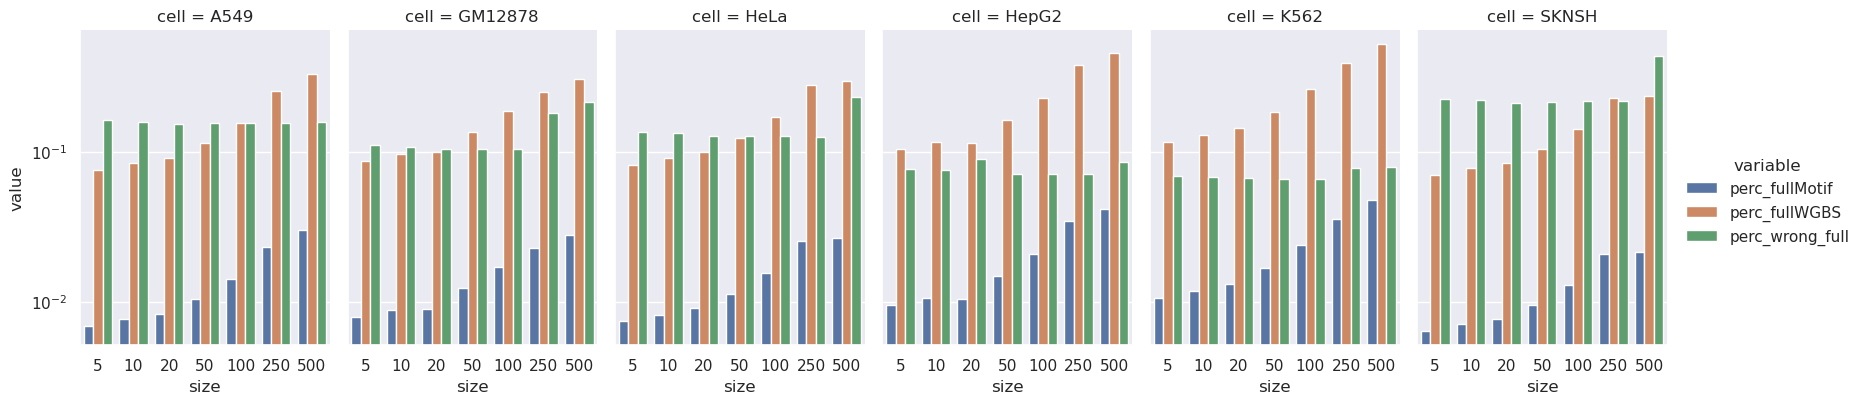

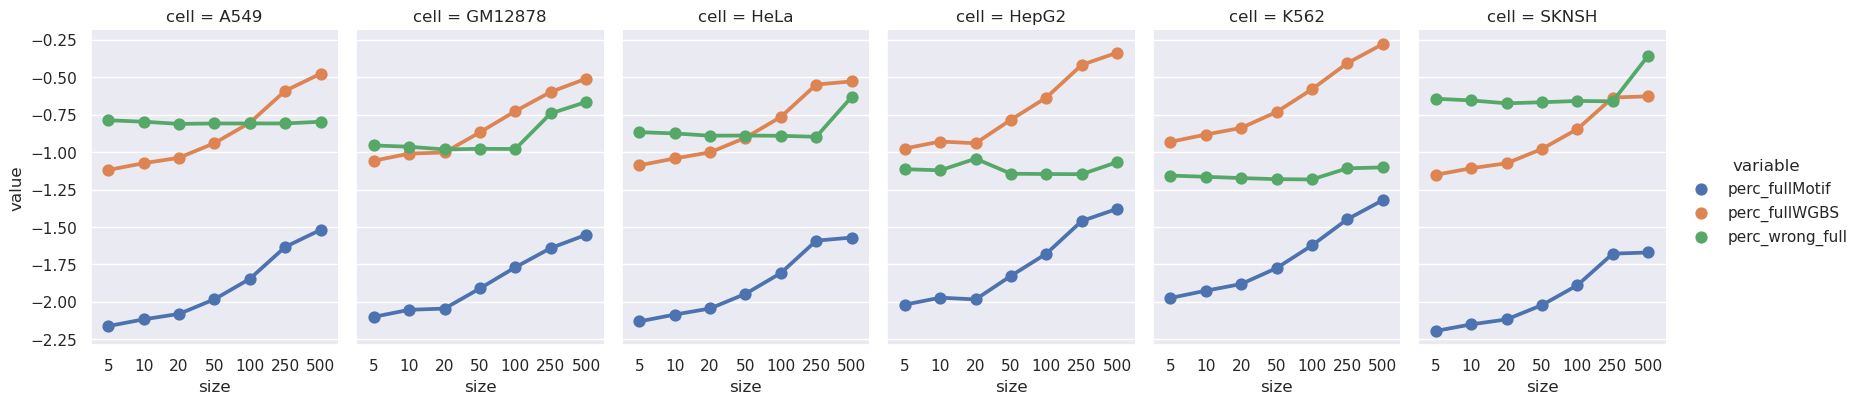

In [654]:
data3['perc_wrong_full']=data3.unique/data3.full
data3['perc_fullMotif']=data3.unique/645861247
data3['perc_fullWGBS']=data3.unique/58607924
# data3['perc_fullWGBSChIP']=data3.unique/3000000
data3['size']=data3['size'].astype(int)

data4=data3.melt(id_vars=['cell', 'size'],value_vars=['perc_fullMotif','perc_fullWGBS','perc_wrong_full'])#,'perc_fullWGBSChIP'])

g = sns.catplot(x="size", y="value",hue="variable", col="cell",
                data=data4, kind="bar",height=4, aspect=.7,log=True)
g = sns.catplot(x="size", y=np.log10(data4.value),hue="variable", col="cell",
                data=data4, kind="point",height=4,aspect=.7,log=True)

In [686]:
data2['perc']=data2.unique/data2.full
data2['size']=data2['size'].astype('int')
data2=data2.sort_values('size', axis=0)

data2

,unique,full,size,cell,tf,perc
cell_tf,,,,,,
HepG2_IRF7,1882,3188,5,HepG2,IRF7,0.590339
SKNSH_ZNF76,8063,12546,5,SKNSH,ZNF76,0.642675
SKNSH_ZNF75A,2288,2509,5,SKNSH,ZNF75A,0.911917
SKNSH_ZNF740,9039,18470,5,SKNSH,ZNF740,0.489388
SKNSH_ZNF713,3090,3455,5,SKNSH,ZNF713,0.894356
...,...,...,...,...,...,...
A549_BARHL1,1195,1447,500,A549,BARHL1,0.825847
A549_BARHL2,5398,6416,500,A549,BARHL2,0.841334
A549_BARX1,2237,2974,500,A549,BARX1,0.752186


<AxesSubplot:xlabel='perc', ylabel='Count'>

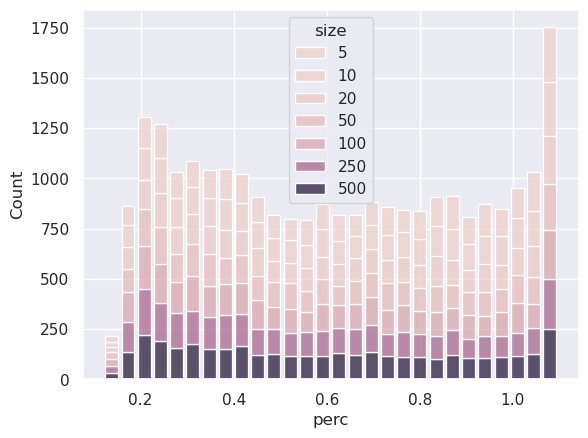

In [688]:
sns.histplot(data=data2, x="perc", hue="size", multiple="stack", shrink=.8)

<AxesSubplot:xlabel='perc', ylabel='Density'>

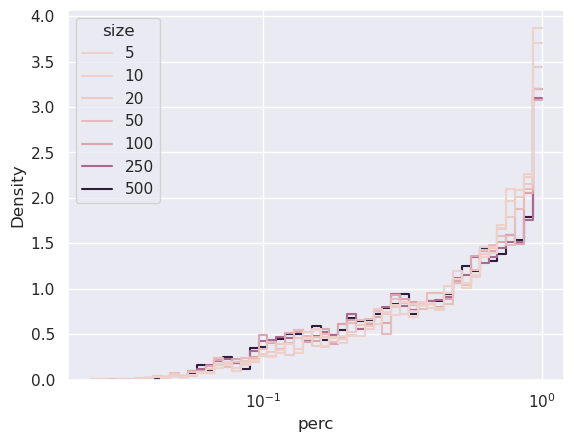

In [690]:
sns.histplot(
    data=data2, x="perc", hue="size",
#     hue_order=["Radial Velocity", "Transit"],
    log_scale=True, element="step", fill=False,
    cumulative=False, stat="density", common_norm=False,
)

In [725]:
full_count=pd.read_csv('data/MotifPipeline/compare/total_reads.txt',names=['count','motif'],sep=' ')
conv=pd.read_csv('mili_benchmark/data/Homo_sapiens_motifinfo.txt',names=['motif','gene'],sep='\t')


In [727]:
DDD=pd.merge(full_count,conv)

In [730]:
DATUM=pd.merge(data2,DDD,left_on='tf',right_on='gene')

In [736]:
DATUM['DDD']=DATUM['unique'].astype('int')/DATUM['count'].astype('int')

<AxesSubplot:xlabel='DDD', ylabel='Density'>

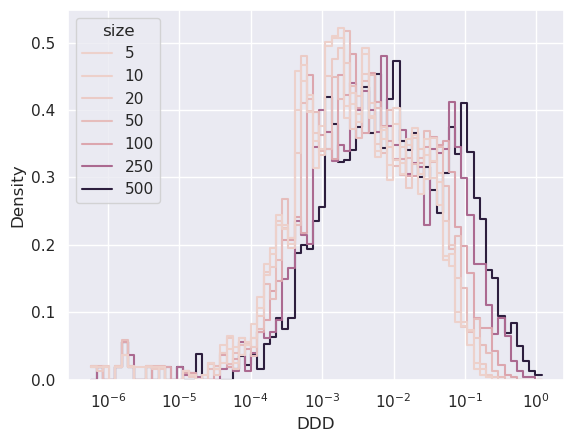

In [743]:
sns.histplot(
    data=DATUM.dropna(), x="DDD", hue="size",
#     hue_order=["Radial Velocity", "Transit"],
    log_scale=True, element="step", fill=False,
    cumulative=False, stat="density", common_norm=False,
)

In [ ]:
g = sns.FacetGrid(DATUM.dropna(), col="size",row='cell',hue='size')
g.map(sns.histplot,"DDD", log_scale=True)

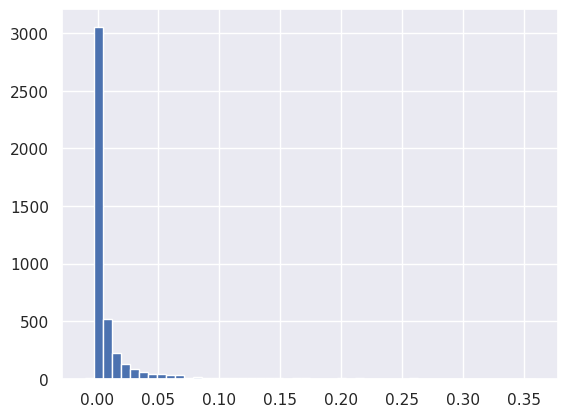

In [802]:
cc=plt.hist(DATUM[DATUM['size']==100].DDD.astype('float').reset_index().DDD-
            DATUM[DATUM['size']==5].DDD.astype('float').reset_index().DDD,bins=50)

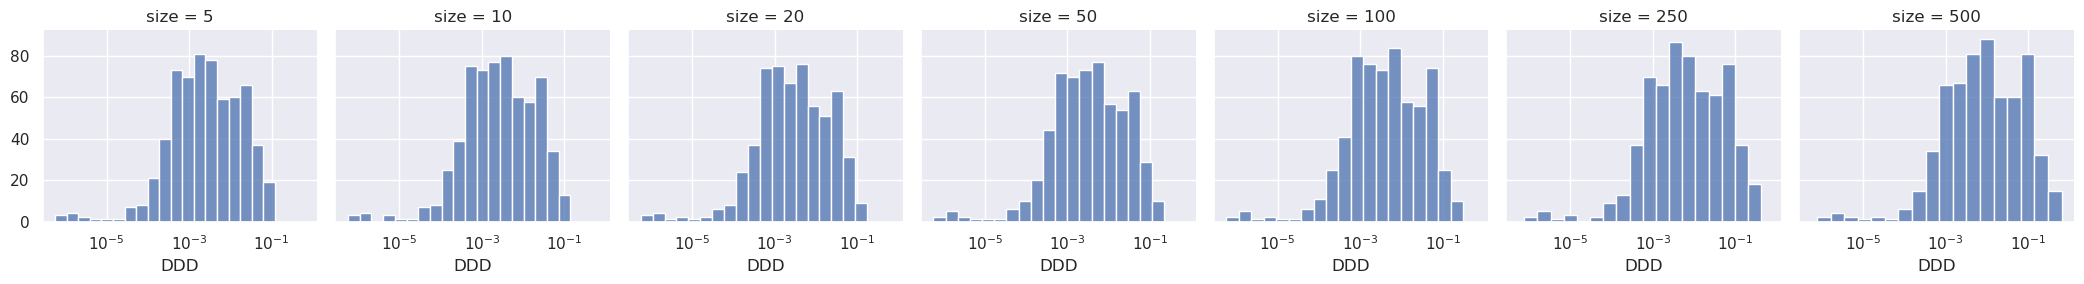

In [767]:
D2=DATUM[DATUM['cell']=='GM12878']
g = sns.FacetGrid(D2.dropna(), col="size")
g.map(sns.histplot,"DDD", log_scale=True)

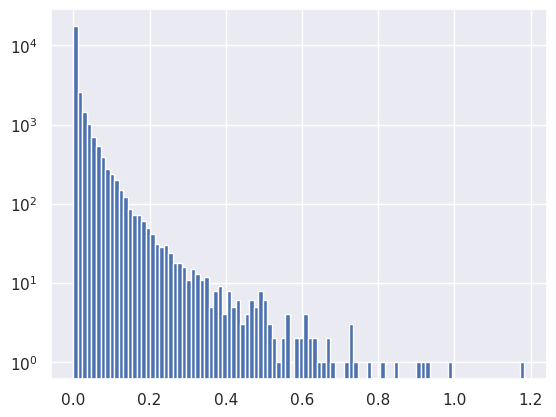

In [747]:
sns.scatterplot(data=DATUM, x="total_bill", y="tip", hue="time")